In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Support Vector Machine
from sklearn.svm import SVR

# KNN
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ANN
from keras.models import Sequential
from keras.layers import Dense

# RandomForest 
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/outlierRemovedProcessedData.csv")

In [ ]:
data.head()

,city,state,street,streetSuffix,zip,latitude,longitude,landUseDescription,zoningDescription,lotSizeAcres,lotSizeSquareFeet,lotTopography,condition,architecturalStyle,yearBuilt,totalStories,totalRooms,bedrooms,baths,heating,airConditioning,foundation,fireplace,soldYear,housePrice
0,0.555556,0.183673,0.731019,0.730159,-0.42215,0.067219,-0.106941,0.769231,0.487179,0.521220,0.521220,0.2,0.0,0.8,-1.161442,-1.101543,0.589168,-0.64725,-1.066788,0.25,1.0,0.0,0.0,0.0,179300
1,0.555556,0.183673,0.637336,0.571429,-0.42215,-10.650685,10.653853,0.769231,0.487179,0.735954,0.735954,0.2,0.0,0.4,-1.237048,0.879733,-0.749912,-0.64725,0.317929,0.25,1.0,1.0,0.0,0.0,210500
2,0.555556,0.183673,0.487877,0.222222,-0.42215,0.068531,-0.107635,0.230769,0.474359,0.682270,0.682270,0.2,0.0,0.2,-1.237048,0.879733,0.589168,0.70620,0.317929,0.25,1.0,1.0,0.0,0.0,251400
3,0.555556,0.183673,0.212180,0.650794,-0.42215,0.067796,-0.107374,0.769231,0.487179,0.574903,0.574903,0.2,0.0,1.0,-1.237048,-1.101543,-0.749912,-0.64725,-1.066788,0.25,1.0,1.0,0.0,0.0,215400
4,0.555556,0.183673,0.198748,0.650794,-0.42215,0.067623,-0.107263,0.769231,0.474359,1.326472,1.326471,0.2,0.0,0.6,-0.783414,-1.101543,-0.749912,-0.64725,-1.066788,0.25,1.0,0.0,0.0,0.0,191800


In [ ]:
X = data.iloc[:, :-1]
y = data["housePrice"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=27)

In [ ]:
def ANN():
  model = Sequential()
  model.add(Dense(input_dim=24, units=64, activation=None))
  model.add(Dense(units=32, activation=None))
  model.add(Dense(units=16, activation=None))
  model.add(Dense(units=1, activation=None))
  model.compile(loss="mse", metrics=['mae'], optimizer='adam')
  return model

In [ ]:
models = {
          "KNN": KNeighborsRegressor(n_neighbors=5),
          "ANN": ANN(),
          "Decision Trees": DecisionTreeRegressor(max_depth=15),
          "Random Forest": RandomForestRegressor(max_depth=23)
          }

In [ ]:
def save_and_display(y_true, y_pred, name, prompt):
  plt.scatter(y_true, y_pred, c='w', edgecolors='b')
  plt.plot(y_true, y_true, c='r')
  plt.title(f"Calibration Plot for {name} on {prompt} Data")
  plt.xlabel("Actual House Price")
  plt.ylabel("Predicted House Price")
  plt.savefig(f"Output/cp_{name}_{prompt}.png", dpi=300)
  plt.show()

In [ ]:
import os
if not os.path.exists("Output"):
  os.mkdir("Output")

Working on KNN Regression
here
Train R2 using KNN: 0.795
Test R2 using KNN: 0.681


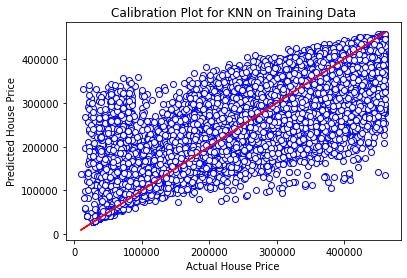

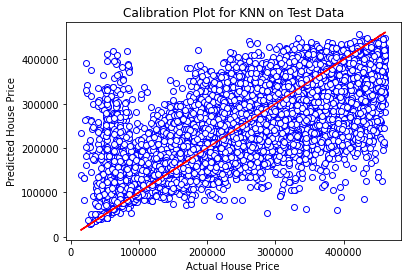

Working on ANN Regression
Epoch 1/15
4758/4758 [==============================] - 7s 1ms/step - loss: 0.3423 - mae: 0.4287
Epoch 2/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3218 - mae: 0.4164
Epoch 3/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3197 - mae: 0.4147
Epoch 4/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3182 - mae: 0.4135
Epoch 5/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3172 - mae: 0.4126
Epoch 6/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3168 - mae: 0.4124
Epoch 7/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3165 - mae: 0.4119
Epoch 8/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3162 - mae: 0.4118
Epoch 9/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3160 - mae: 0.4115
Epoch 10/15
4758/4758 [==============================] - 6s 1ms/step - loss: 0.3158 - mae: 0.4117
Epo

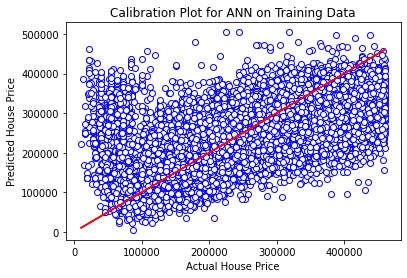

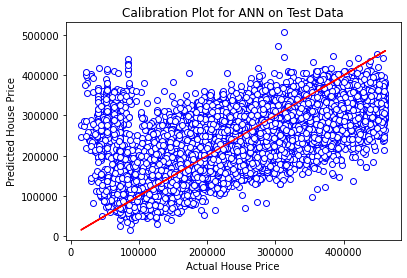

Working on Decision Trees Regression
here
Train R2 using Decision Trees: 0.862
Test R2 using Decision Trees: 0.804


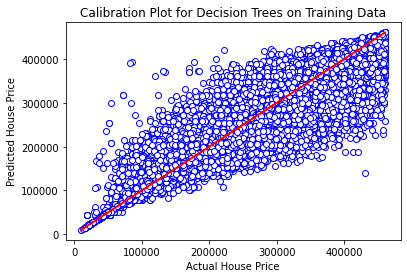

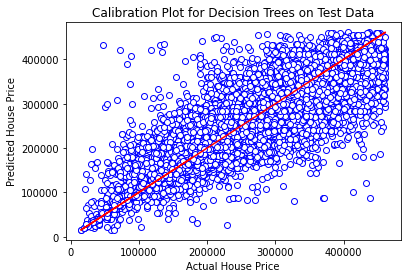

Working on Random Forest Regression
here
Train R2 using Random Forest: 0.968
Test R2 using Random Forest: 0.88


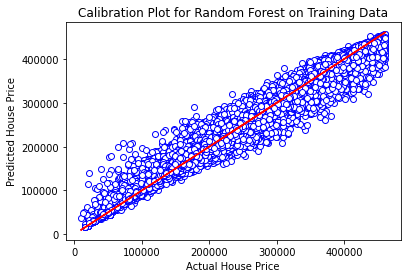

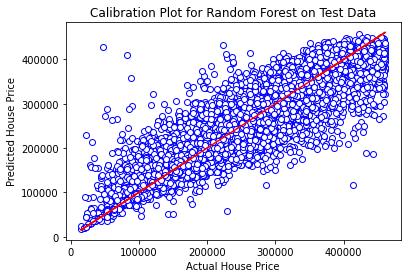

In [ ]:
r2_scores = dict()

for name, model in models.items():
  print(f"Working on {name} Regression") 
  if name == "ANN":
    y_train_ann = y_train/100000
    model.fit(X_train, y_train_ann, epochs=15, verbose=1)
  else:
    model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  y_pred = model.predict(X_test)

  if name=="ANN":
    train_pred = train_pred * 100000
    y_pred = y_pred * 100000

  train_r2 = round(r2_score(y_train, train_pred), 3)
  print(f"Train R2 using {name}: {train_r2}")

  test_r2 = round(r2_score(y_test, y_pred), 3)
  print(f"Test R2 using {name}: {test_r2}")
  save_and_display(y_train, train_pred, name, "Training")
  save_and_display(y_test, y_pred, name, "Test")
  r2_scores[name] = [train_r2, test_r2]

In [ ]:
r2_scores

{'ANN': [0.491, 0.486],
 'Decision Trees': [0.862, 0.804],
 'KNN': [0.795, 0.681],
 'Random Forest': [0.968, 0.88]}

In [ ]:
def comparision(x_plot, y_plot, prompt):
  plt.figure(figsize=(18,8))
  plt.title(f"R2 Scores on {prompt} Data")
  plt.xlabel("Algorithm")
  plt.ylabel("R2 Score")
  g=sns.barplot(x_plot, y_plot)
  for i,p in enumerate(g.patches):
          percentage = '{:.3f}'.format(y_plot[i])
          x1 = p.get_x() + p.get_width() - 0.5
          y1 = p.get_y() + p.get_height() + 0.02
          g.annotate(percentage, (x1, y1))
  plt.savefig(f"Output/comparison_{prompt}.png", dpi=300)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


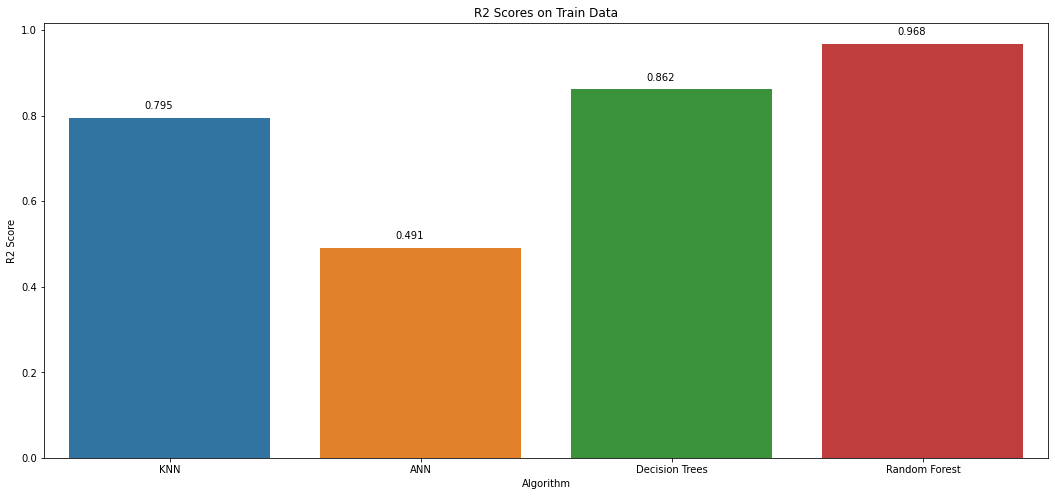

In [ ]:
x_plot = list(r2_scores.keys())
y_plot_train = [train for train, test in r2_scores.values()]
y_plot_test = [test for train, test in r2_scores.values()]
comparision(x_plot, y_plot_train, "Train")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


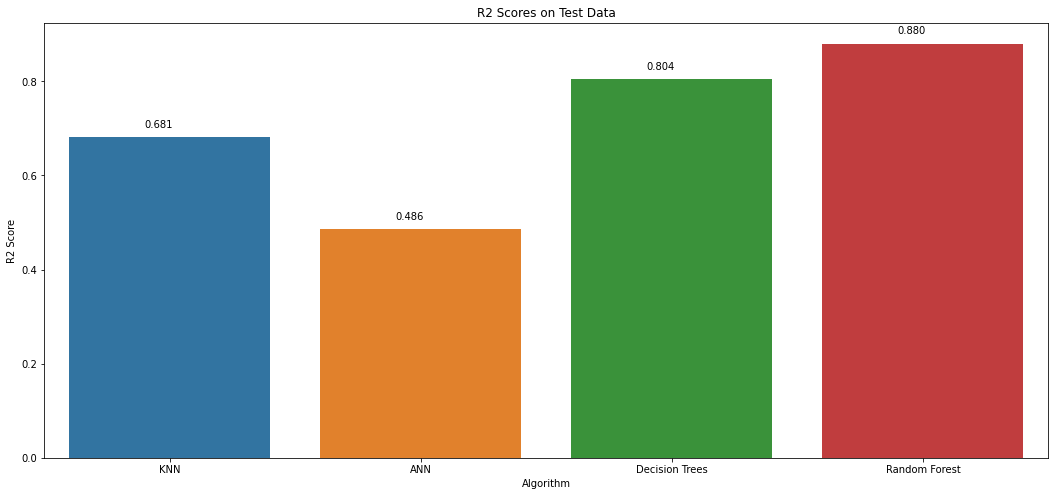

In [ ]:
comparision(x_plot, y_plot_test, "Test")

In [ ]:
from joblib import dump

dump(model, "final_rf_model.joblib")

['final_rf_model.joblib']